# Project: Environment-Aware Adaptive Communications for High-Speed Trains

This program examines which models perform better by processing synthetic data with various machine learning and deep learning models.


## 1. Import Libraries & Initialization

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


"""
Models:
  1. Logistic Regression
  2. Naive Bayes
  3. K-Nearest Neighbours (KNN)
  4. Support Vector Machine
  5. Decision Tree
  6. Random Forest
  7. Gradient Boosting
  8. Neural Network
"""


# uncomment to see plots in notebook
%matplotlib inline


In [2]:
# import csv
df = pd.read_csv(r"D:\BITIRME-PROJESI\Bitirme\Model\datasetCombined.csv")
df.columns = ["Cografya_zorlugu", "Tunel_sayisi", "Hava_kosulu_zorlugu", "Iletim_noktasi_uzaklik", "DurumLOS", "Bolge_tren_hizi", "Hedef_degisken"]
df.head()

,Cografya_zorlugu,Tunel_sayisi,Hava_kosulu_zorlugu,Iletim_noktasi_uzaklik,DurumLOS,Bolge_tren_hizi,Hedef_degisken
0,10,5,10,4,5,5,1
1,5,4,9,5,6,4,1
2,1,5,4,8,6,7,2
3,9,4,8,10,10,1,2
4,2,4,9,1,6,4,1


## 2. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Cografya_zorlugu        9999 non-null   int64
 1   Tunel_sayisi            9999 non-null   int64
 2   Hava_kosulu_zorlugu     9999 non-null   int64
 3   Iletim_noktasi_uzaklik  9999 non-null   int64
 4   DurumLOS                9999 non-null   int64
 5   Bolge_tren_hizi         9999 non-null   int64
 6   Hedef_degisken          9999 non-null   int64
dtypes: int64(7)
memory usage: 546.9 KB


In [4]:
df.describe()

,Cografya_zorlugu,Tunel_sayisi,Hava_kosulu_zorlugu,Iletim_noktasi_uzaklik,DurumLOS,Bolge_tren_hizi,Hedef_degisken
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,5.263526,5.131613,5.206621,5.279428,5.529153,5.368837,1.488649
std,2.573633,2.563122,2.547393,2.562038,2.561960,2.555402,0.499896
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,1.000000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000
75%,7.000000,7.000000,7.000000,7.000000,8.000000,7.000000,2.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


<function matplotlib.pyplot.show(close=None, block=None)>

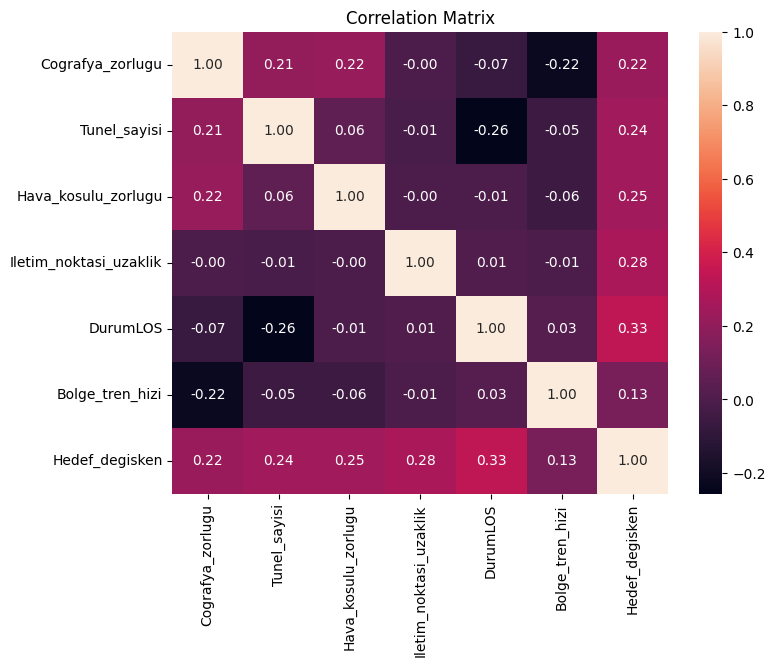

In [5]:
# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.show

In [6]:
df.isnull().sum() # null count

Cografya_zorlugu          0
Tunel_sayisi              0
Hava_kosulu_zorlugu       0
Iletim_noktasi_uzaklik    0
DurumLOS                  0
Bolge_tren_hizi           0
Hedef_degisken            0
dtype: int64

## 3. Data Seperation

In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(["Hedef_degisken"], axis=1)

y = df["Hedef_degisken"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((6999, 6), (3000, 6))

## 4. Scaling

In [8]:
scaler = StandardScaler()

cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,Cografya_zorlugu,Tunel_sayisi,Hava_kosulu_zorlugu,Iletim_noktasi_uzaklik,DurumLOS,Bolge_tren_hizi
0,-0.101048,1.513670,-0.460414,1.059206,0.180509,-0.924948
1,1.462769,-0.437735,-0.460414,0.670481,0.180509,-0.532221
2,-1.273911,-0.047454,-0.065653,1.059206,-0.208583,1.038686
3,0.289906,-0.437735,-0.065653,-1.273147,1.347787,1.038686
4,-0.101048,-1.608578,1.513393,1.836657,-0.597676,-0.924948


## 5. Model Training

### 6.1 Logistic Regression

In [9]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

predictions1 = model1.predict(X_test)

### 6.2 Naive Bayes

In [10]:
model2 = GaussianNB()
model2.fit(X_train, y_train)

predictions2 = model2.predict(X_test)

### 6.3 K-Nearest Neighbours (KNN)

In [11]:
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)

predictions3 = model3.predict(X_test)

### 6.4 Support Vector Machine

In [12]:
model4 = SVC(kernel='linear')
model4.fit(X_train, y_train)

predictions4 = model4.predict(X_test)

### 6.5 Decision Tree

In [13]:
model5 = DecisionTreeClassifier(random_state=42)
model5.fit(X_train, y_train)

predictions5 = model5.predict(X_test)

### 6.6 Random Forest

In [14]:
model6 = RandomForestClassifier(n_estimators=100, random_state=42)
model6.fit(X_train, y_train)

predictions6 = model6.predict(X_test)

### 6.7 Gradient Boosting

In [15]:
model7 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model7.fit(X_train, y_train)

predictions7 = model7.predict(X_test)

### 6.8 Neural Network

In [16]:
model8 = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', random_state=42, max_iter=1000)

# Training the model
model8.fit(X_train, y_train)

# Prediction and evaluation
predictions8 = model8.predict(X_test)
nn_accuracy = accuracy_score(y_test, predictions8)

## 6. Cross Validation Check

In [17]:
models = [model1, model2, model3, model4, model5, model6, model7, model8]

for idx, model in enumerate(models, start=1):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')  # You can use a different scoring metric
    print(f"Cross-validation results for Model {idx}: {cv_results}")
    print(f"Mean accuracy for Model {idx}: {cv_results.mean()}\n")

Cross-validation results for Model 1: [0.79      0.8005    0.79      0.788     0.7913957]
Mean accuracy for Model 1: 0.7919791395697848

Cross-validation results for Model 2: [0.774      0.7925     0.778      0.7715     0.77238619]
Mean accuracy for Model 2: 0.7776772386193096

Cross-validation results for Model 3: [0.874      0.8785     0.876      0.875      0.86743372]
Mean accuracy for Model 3: 0.8741867433716859

Cross-validation results for Model 4: [0.791      0.802      0.7885     0.787      0.79189595]
Mean accuracy for Model 4: 0.7920791895947974

Cross-validation results for Model 5: [0.9425     0.9435     0.943      0.946      0.93196598]
Mean accuracy for Model 5: 0.9413931965982993

Cross-validation results for Model 6: [0.9505     0.9535     0.9545     0.959      0.95347674]
Mean accuracy for Model 6: 0.954195347673837

Cross-validation results for Model 7: [0.9505     0.9605     0.956      0.963      0.95797899]
Mean accuracy for Model 7: 0.9575957978989494

Cross-valida

## 7. Performance Analysis

In [18]:
# Initialize lists to store metrics for each model
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_auc_scores = []
all_predictions = [predictions1, predictions2, predictions3, predictions4, predictions5, predictions6, predictions7, predictions8]

for idx, y_pred in enumerate(all_predictions, start=1):
    model_name = models[idx - 1]
    print(f"Performance analysis for {model_name}")

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    accuracies.append(accuracy)

    # Calculate and print precision
    precision = precision_score(y_test, y_pred)
    print(f"Precision: {precision:.4f}")
    precisions.append(precision)

    # Calculate and print recall
    recall = recall_score(y_test, y_pred)
    print(f"Recall: {recall:.4f}")
    recalls.append(recall)

    # Calculate and print F1-score
    f1 = f1_score(y_test, y_pred)
    print(f"F1-score: {f1:.4f}")
    f1_scores.append(f1)

    # Calculate and print ROC AUC score (if applicable for your problem)
    try:
        roc_auc = roc_auc_score(y_test, y_pred)
        print(f"ROC AUC: {roc_auc:.4f}")
        roc_auc_scores.append(roc_auc)
    except ValueError:
        print("ROC AUC score is not applicable for this model.")

    print("=" * 50)

Performance analysis for LogisticRegression()
Accuracy: 0.7973
Precision: 0.7942
Recall: 0.8048
F1-score: 0.7995
ROC AUC: 0.7973
Performance analysis for GaussianNB()
Accuracy: 0.7833
Precision: 0.7726
Recall: 0.8054
F1-score: 0.7887
ROC AUC: 0.7832
Performance analysis for KNeighborsClassifier()
Accuracy: 0.8790
Precision: 0.8699
Recall: 0.8924
F1-score: 0.8810
ROC AUC: 0.8789
Performance analysis for SVC(kernel='linear')
Accuracy: 0.7953
Precision: 0.7881
Recall: 0.8101
F1-score: 0.7990
ROC AUC: 0.7953
Performance analysis for DecisionTreeClassifier(random_state=42)
Accuracy: 0.9443
Precision: 0.9454
Recall: 0.9436
F1-score: 0.9445
ROC AUC: 0.9443
Performance analysis for RandomForestClassifier(random_state=42)
Accuracy: 0.9577
Precision: 0.9575
Recall: 0.9582
F1-score: 0.9578
ROC AUC: 0.9577
Performance analysis for GradientBoostingClassifier(random_state=42)
Accuracy: 0.9577
Precision: 0.9446
Recall: 0.9728
F1-score: 0.9585
ROC AUC: 0.9576
Performance analysis for MLPClassifier(hid

## 8. CHECK OVERFITTING AND UNDERFITTING

In [19]:
models = [model1, model2, model3, model4, model5, model6, model7, model8]

for model in models[:-1]:
    print(f"{model}:\nTraining set score: {model.score(X_train, y_train)}")
    print(f"Test set score:{model.score(X_test, y_test)}\n")

# for NN
print(f"KerasNeuralNetork accuracy: {nn_accuracy}")

# Theese value couples should be close to each other

LogisticRegression():
Training set score: 0.790255750821546
Test set score:0.7973333333333333

GaussianNB():
Training set score: 0.7761108729818545
Test set score:0.7833333333333333

KNeighborsClassifier():
Training set score: 0.91941705957994
Test set score:0.879

SVC(kernel='linear'):
Training set score: 0.7896842406058008
Test set score:0.7953333333333333

DecisionTreeClassifier(random_state=42):
Training set score: 0.9992856122303186
Test set score:0.9443333333333334

RandomForestClassifier(random_state=42):
Training set score: 0.9992856122303186
Test set score:0.9576666666666667

GradientBoostingClassifier(random_state=42):
Training set score: 0.9588512644663524
Test set score:0.9576666666666667

KerasNeuralNetork accuracy: 0.953


## 9. CONFUSION MATRIX


Confusion Matrix for model1:


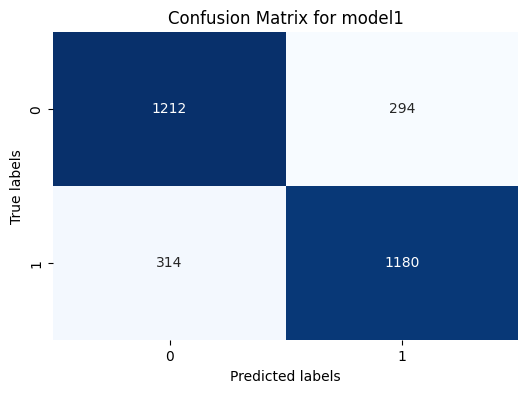

Confusion Matrix for model2:


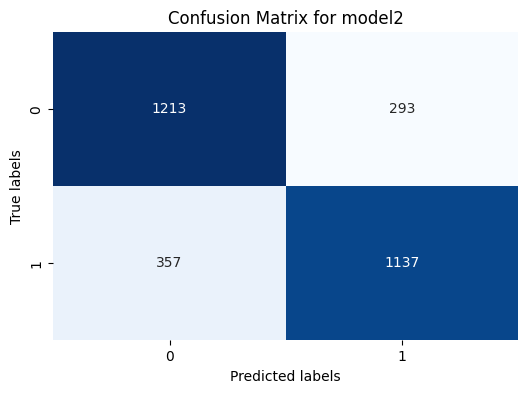

Confusion Matrix for model3:


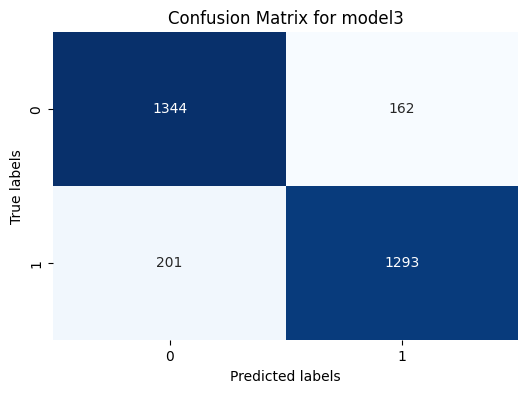

Confusion Matrix for model4:


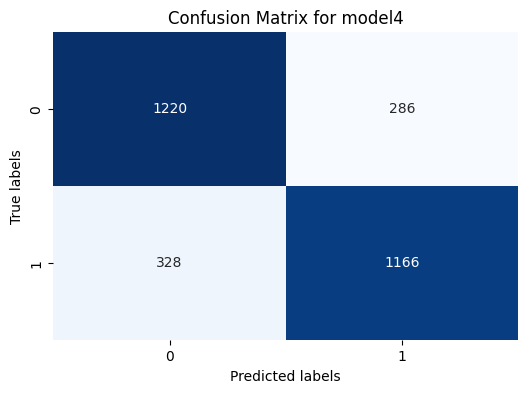

Confusion Matrix for model5:


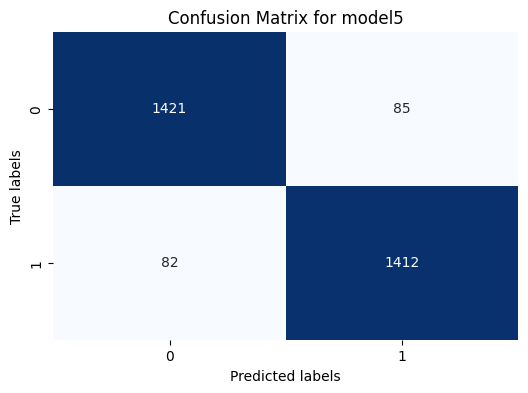

Confusion Matrix for model6:


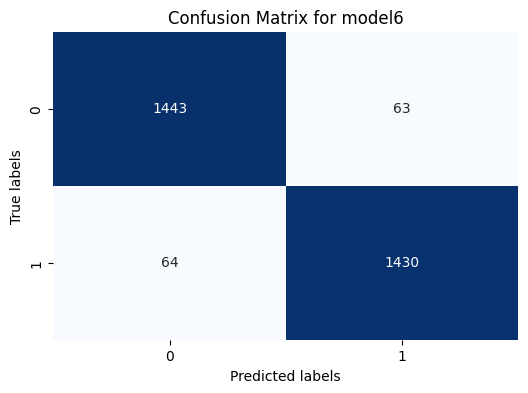

Confusion Matrix for model7:


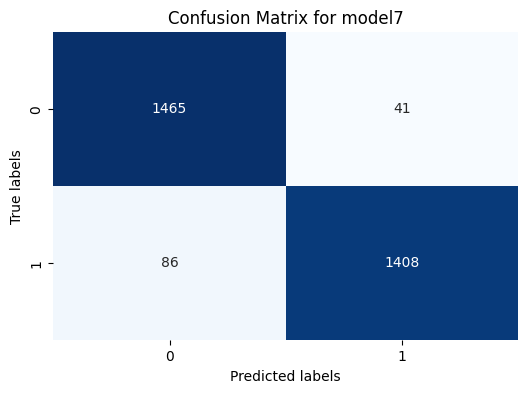

Confusion Matrix for model8:


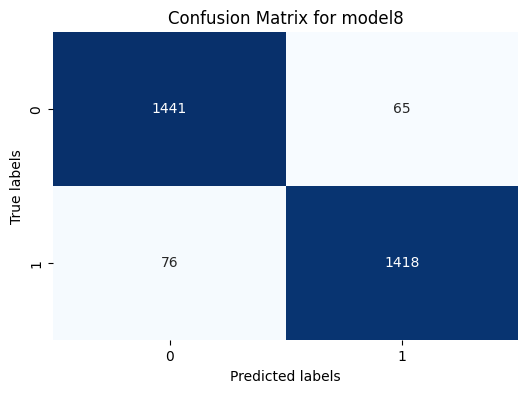

In [20]:
models = ['model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7', 'model8']

all_predictions = [predictions1, predictions2, predictions3, predictions4, predictions5, predictions6, predictions7, predictions8]

y_true = ...  # Replace this with your true labels

# Loop through each model's predictions
for idx, y_pred in enumerate(all_predictions, start=1):
    model_name = models[idx - 1]
    print(f"Confusion Matrix for {model_name}:")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()